# Fase 1 — Árbol de Decisión (XAI · Unidad 2)

**Autores:** Jordi Florit Ensenyat · Josep Gabriel Fornes Reynes · Juan Esteban Rincón Marín  
**Asignatura:** Inteligencia Artificial Explicable — Hands-on Project (U2)  
**Fecha:** 28-09-2025

In [1]:
import sys
if 'google.colab' in sys.modules:
  !pip install -q dtreeviz
!pip install interpret six graphviz pydotplus

# Exploración inicial de los datos
Antes de entrenar el modelo, queremos entender la estructura del dataset:
- Número de instancias y variables (`df.info()`).
- Tipos de variables (categóricas, numéricas, binarias).
- Distribución de la variable objetivo (¿balanceada o desbalanceada?).

Esto nos ayuda a anticipar posibles problemas en el modelo, como sesgo hacia la clase mayoritaria.


In [13]:
import pandas as pd

df = pd.read_csv("recidivism.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4222 entries, 0 to 4221
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   sex                    4222 non-null   int64 
 1   age                    4222 non-null   int64 
 2   juv_fel_count          4222 non-null   int64 
 3   juv_misd_count         4222 non-null   int64 
 4   juv_other_count        4222 non-null   int64 
 5   priors_count           4222 non-null   int64 
 6   race_African-American  4222 non-null   int64 
 7   race_Caucasian         4222 non-null   int64 
 8   c_charge_degree_F      4222 non-null   int64 
 9   c_charge_degree_M      4222 non-null   int64 
 10  employment             4222 non-null   object
 11  recid                  4222 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 395.9+ KB


,sex,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,race_African-American,race_Caucasian,c_charge_degree_F,c_charge_degree_M,employment,recid
0,0,45,0,0,0,1,0,1,1,0,unemployed,1
1,1,43,0,0,0,2,1,0,0,1,unemployed,0
2,0,26,0,0,0,0,1,0,1,0,employed,0
3,1,35,0,0,0,1,0,1,1,0,unemployed,1
4,1,27,0,0,0,0,1,0,1,0,unemployed,1


## División de datos (train-test) y Definición del Modelo Base

En esta sección, preparamos los datos para el entrenamiento del modelo y definimos la estructura básica del clasificador de árbol de decisión.

1.  **División de Datos:** Dividimos el dataset en conjuntos de entrenamiento y prueba (`X_train`, `X_test`, `y_train`, `y_test`). La división se realiza utilizando `train_test_split` con un 30% de los datos para prueba y estratificación por la variable objetivo (`recid`) para mantener las proporciones de clase.

2.  **Definición del Modelo Base:** Importamos `DecisionTreeClassifier` de scikit-learn. Aunque en este punto aún no hemos definido los hiperparámetros óptimos, preparamos la importación de la función necesaria para la construcción del modelo.

In [3]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Definir target y variables predictoras
X = df.drop(columns=["recid"])   # Todas las columnas menos la variable objetivo
y = df["recid"]                  # Variable objetivo

# Dividir en train (70%) y test/valid (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,         # porcentaje para el test
    random_state=42,        # semilla para reproducibilidad
    stratify=y              # asegura que las proporciones de clases se mantengan
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (2955, 11) (2955,)
Test shape: (1267, 11) (1267,)


# Preprocesamiento de los datos
En este paso definimos:
- **Variables categóricas**: se codifican mediante *OneHotEncoder*.
- **Variables numéricas**: no requieren escalado para árboles, pero podrían normalizarse si se combinan con otros algoritmos.
- **Pipeline**: asegura que todo el flujo (preprocesamiento + modelo) se ejecute de forma coherente en entrenamiento y test.

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_text
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np
import seaborn as sns

In [5]:
# Preprocesamiento: numéricas (passthrough), categóricas (One-Hot)
num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# Logical classifiers
- tree
- lists
- sets

# Decision Tree Classifier

In [ ]:
# Pipeline: preprocesamiento + modelo
clf = Pipeline(steps=[
    ("prep", preprocess),
    ("dt", DecisionTreeClassifier(random_state=42))
])

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

## Decision Tree Classifier simple
Entrenamos un primer modelo base (sin tuning) para establecer un punto de comparación.
Este baseline nos permitirá medir cuánto mejora el rendimiento tras aplicar **GridSearchCV**.


Accuracy (valid): 0.6590

== Classification report (valid) ==
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       674
           1       0.65      0.59      0.62       593

    accuracy                           0.66      1267
   macro avg       0.66      0.65      0.65      1267
weighted avg       0.66      0.66      0.66      1267

== Confusion matrix (valid) ==


[]

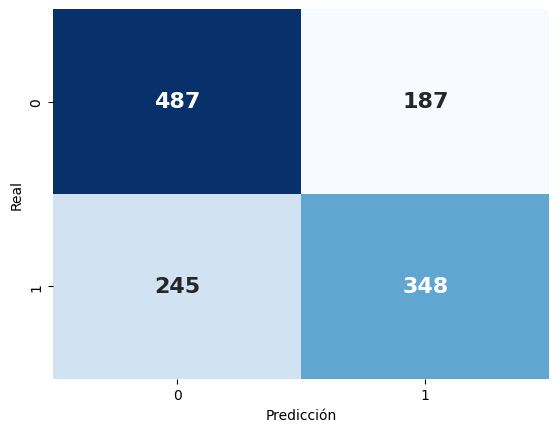

In [ ]:
# Entrenar
clf.fit(X_train, y_train)

# Evaluar
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy (valid): {acc:.4f}\n")

print("== Classification report (valid) ==")
print(classification_report(y_test, y_pred))

print("== Confusion matrix (valid) ==")
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16, "weight": "bold"});ax.set_xlabel("Predicción"); ax.set_ylabel("Real")
ax.plot()

In [ ]:
# Asumiendo que ya tienes entrenado el árbol en 'model'
# Access the DecisionTreeClassifier from the pipeline
decision_tree_model = clf.named_steps['dt']

# Get feature names after preprocessing
# This requires fitting the preprocessor separately or getting feature names from the pipeline
# For simplicity, let's use the original feature names for now, but be aware of one-hot encoding
# A more robust solution would involve getting feature names from the preprocessor after fitting

# Get feature names from the preprocessor after fitting
# This is a bit more complex because OneHotEncoder changes the feature names
# A simpler approach for visualization might be to use the original feature names
# but the visualization won't reflect the one-hot encoded features

# Let's use the feature names from the fitted preprocessor
try:
    # This works for newer versions of scikit-learn
    feature_names_out = clf.named_steps['prep'].get_feature_names_out(X.columns)
except AttributeError:
    # Fallback for older versions - might not be perfect
    feature_names_out = list(X.columns)


rules = export_text(decision_tree_model, feature_names=list(feature_names_out))
print(rules)

In [ ]:
# Aseguramos nombres de clase legibles (en el mismo orden que usa el modelo)
classes_ = getattr(decision_tree_model, "classes_", None)
if classes_ is None:
    # fallback por si acaso
    classes_ = np.unique(y_train)

plt.figure(figsize=(18, 12))
plot_tree(
    decision_tree_model,
    feature_names=feature_names_out,        # nombres tras One-Hot/ColumnTransformer
    class_names=[str(c) for c in classes_], # etiquetas de clase
    filled=True,
    rounded=True,
    impurity=True,      # gini/entropy en nodos (puedes poner False si lo quieres más limpio)
    proportion=True,    # muestra proporción de muestras por nodo
    fontsize=9
)
plt.title("Árbol de Decisión (con features tras One-Hot)")
plt.tight_layout()
plt.show()


Como podemos ver, el árbol resultante no es nada explicable. Además, no nos da muy buenos resultados.

## GridSearchCV y validación cruzada
- Usamos validación cruzada estratificada (5 folds) para garantizar que las proporciones de clases se mantengan.  
- Buscamos entre distintos hiperparámetros (`criterion`, `max_depth`, `min_samples_split`, etc.).  
- El mejor modelo se selecciona en base a la métrica de **balanced accuracy**, que es más robusta en datasets desbalanceados.


Fitting 5 folds for each of 4032 candidates, totalling 20160 fits
Mejores parámetros: {'dt__class_weight': None, 'dt__criterion': 'gini', 'dt__max_depth': 3, 'dt__max_features': None, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2, 'dt__splitter': 'best'}
Mejor CV (balanced_acc): 0.7191
Accuracy (test): 0.6961
Balanced Acc (test): 0.7019

== Classification report (test) ==
              precision    recall  f1-score   support

           0       0.77      0.61      0.68       674
           1       0.64      0.79      0.71       593

    accuracy                           0.70      1267
   macro avg       0.71      0.70      0.70      1267
weighted avg       0.71      0.70      0.69      1267

== Confusion matrix (test) ==


[]

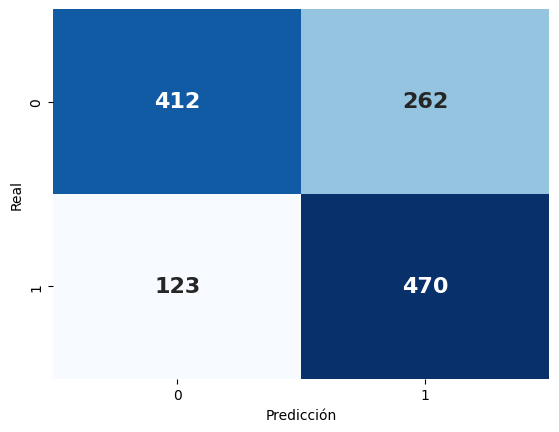

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Esquema de CV estratificado (pide 5-fold en el enunciado)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Rejilla de hiperparámetros del árbol (ajústala si el tiempo es justo)
param_grid = {
    "dt__criterion": ["gini", "entropy", "log_loss"],
    "dt__max_depth": [None, 3, 4, 5, 6, 8, 10],
    "dt__min_samples_split": [2, 5, 10, 20],
    "dt__min_samples_leaf": [1, 2, 5, 10],
    "dt__max_features": [None, "sqrt", "log2"],  # sólo sobre features ya preprocesadas
    "dt__class_weight": [None, "balanced"],      # útil si hay desbalanceo
    "dt__splitter": ["best", "random"]
}

# Métrica: si es binaria y hay desbalanceo, usa balanced_accuracy o roc_auc
grid = GridSearchCV(
    estimator=clf,                # tu Pipeline (prep + dt)
    param_grid=param_grid,
    scoring="balanced_accuracy",  # cambia a "roc_auc" si prefieres AUC
    n_jobs=-1,
    cv=cv,
    refit=True,                   # deja el mejor modelo refitteado en .best_estimator_
    verbose=1,
    return_train_score=True
)

grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)
print(f"Mejor CV (balanced_acc): {grid.best_score_:.4f}")

# Evalúa SÓLO ahora en test (hold-out)
best_clf = grid.best_estimator_
y_pred = best_clf.predict(X_test)

from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix
print(f"Accuracy (test): {accuracy_score(y_test, y_pred):.4f}")
print(f"Balanced Acc (test): {balanced_accuracy_score(y_test, y_pred):.4f}")
print("\n== Classification report (test) ==")
print(classification_report(y_test, y_pred))
print("== Confusion matrix (test) ==")
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16, "weight": "bold"});ax.set_xlabel("Predicción"); ax.set_ylabel("Real")
ax.plot()


### Visualización de árbol

|--- cat__employment_unemployed <= 0.50
|   |--- num__priors_count <= 20.00
|   |   |--- num__sex <= 0.50
|   |   |   |--- class: 0
|   |   |--- num__sex >  0.50
|   |   |   |--- class: 0
|   |--- num__priors_count >  20.00
|   |   |--- class: 1
|--- cat__employment_unemployed >  0.50
|   |--- num__priors_count <= 2.50
|   |   |--- num__age <= 28.50
|   |   |   |--- class: 1
|   |   |--- num__age >  28.50
|   |   |   |--- class: 0
|   |--- num__priors_count >  2.50
|   |   |--- num__age <= 36.50
|   |   |   |--- class: 1
|   |   |--- num__age >  36.50
|   |   |   |--- class: 1



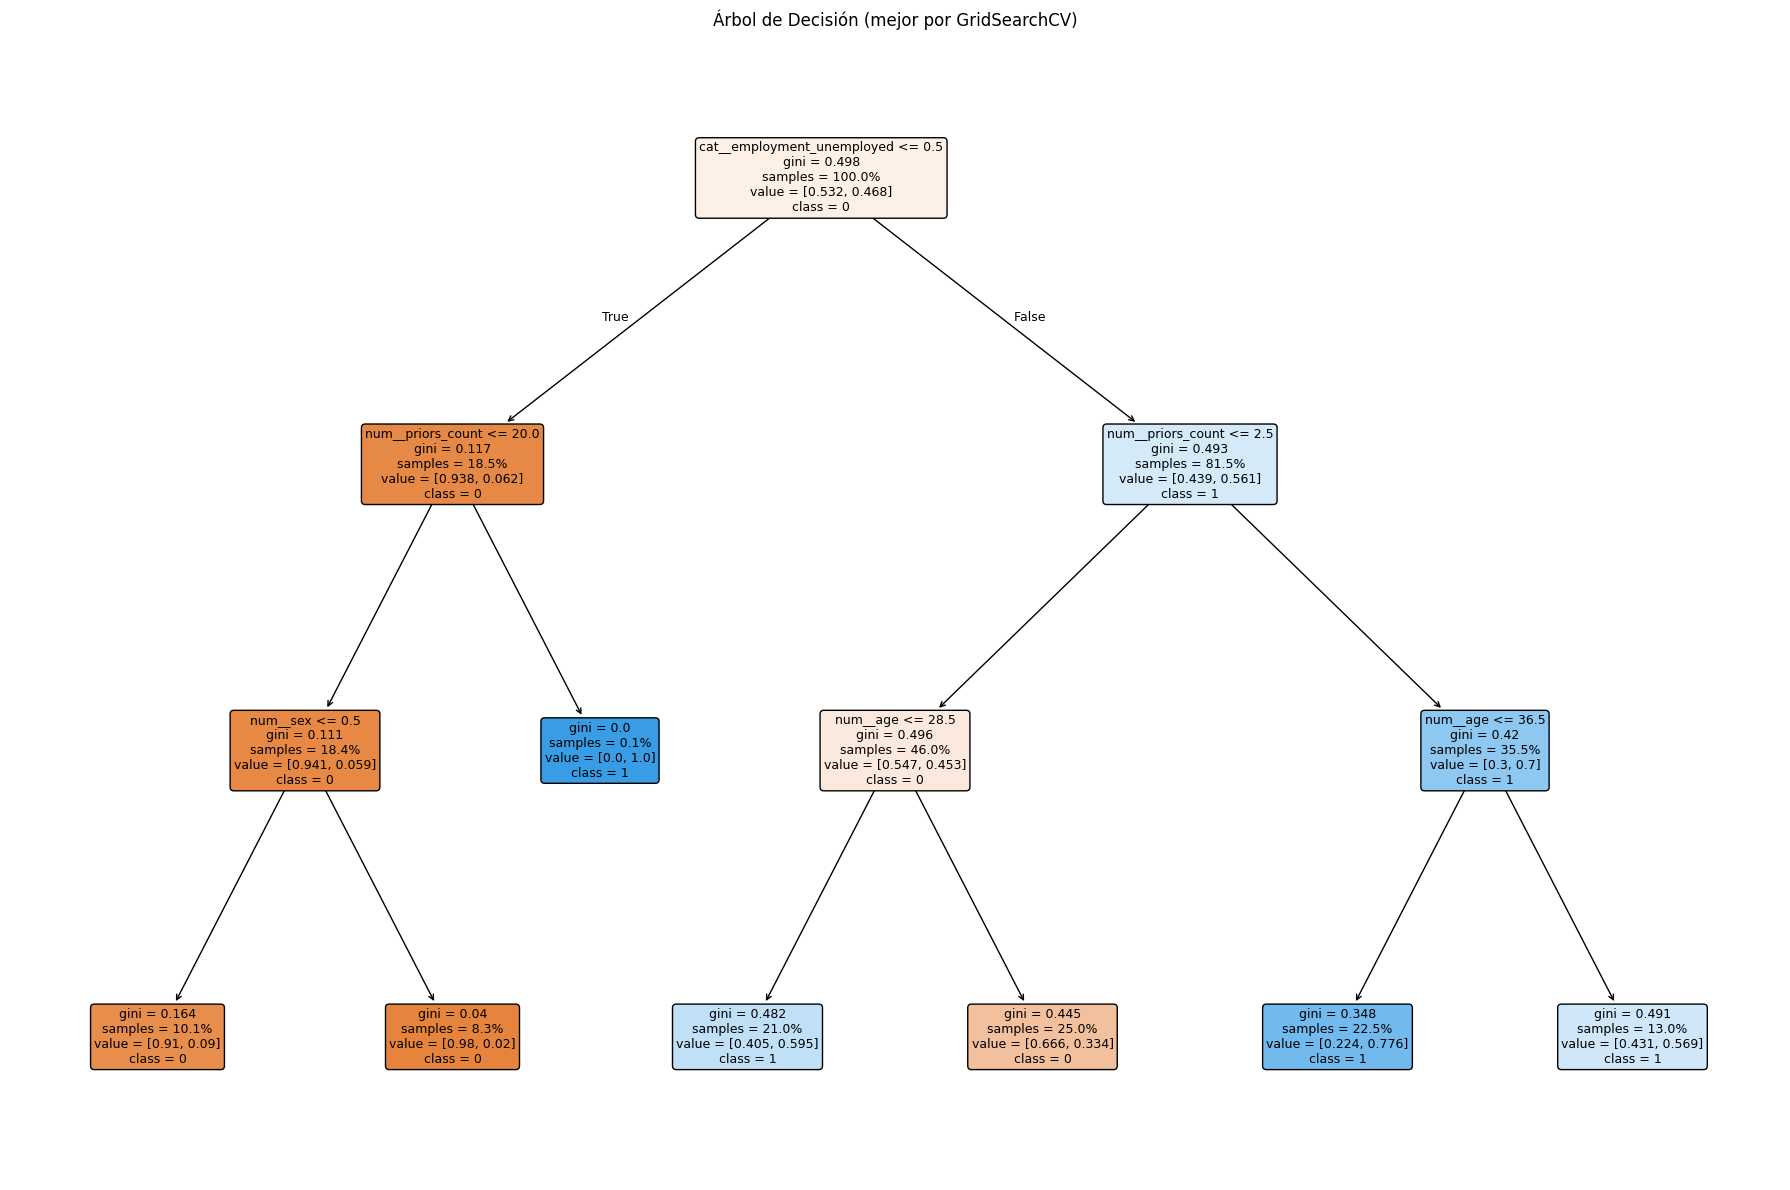

In [ ]:
from sklearn.tree import plot_tree, export_text
import matplotlib.pyplot as plt
import numpy as np

best_dt = best_clf.named_steps["dt"]

# Nombres de features tras el preprocesado
feature_names_out = best_clf.named_steps["prep"].get_feature_names_out(X.columns)

# Reglas en texto
print(export_text(best_dt, feature_names=list(feature_names_out)))

# Plot
classes_ = getattr(best_dt, "classes_", np.unique(y_train))
plt.figure(figsize=(18, 12))
plot_tree(
    best_dt,
    feature_names=feature_names_out,
    class_names=[str(c) for c in classes_],
    filled=True, rounded=True, impurity=True, proportion=True, fontsize=9
)
plt.title("Árbol de Decisión (mejor por GridSearchCV)")
plt.tight_layout()
plt.show()


In [ ]:
# 1) Extrae los hiperparámetros del árbol del GridSearch (prefijo dt__)
best_dt_params = {k.split("dt__")[1]: v for k, v in grid.best_params_.items() if k.startswith("dt__")}

# 2) Filtra solo los compatibles con ClassificationTree de interpret
allowed = {"max_depth", "min_samples_split", "min_samples_leaf"}
ct_params = {k: v for k, v in best_dt_params.items() if k in allowed}
ct_params.setdefault("random_state", 42)

# 3) Preprocesa X con 'prep' del pipeline ganador
prep = best_clf.named_steps["prep"]
Xtr_num = prep.transform(X_train)   # -> array/CSR con one-hot + numéricas
Xte_num = prep.transform(X_test)

# 4) Poner nombres de columnas para que las explicaciones sean legibles
import pandas as pd
feat_out = prep.get_feature_names_out(X_train.columns)
Xtr_df = pd.DataFrame(Xtr_num.toarray() if hasattr(Xtr_num, "toarray") else Xtr_num, columns=feat_out)
Xte_df = pd.DataFrame(Xte_num.toarray() if hasattr(Xte_num, "toarray") else Xte_num, columns=feat_out)

# 5) Entrenar el árbol de interpret con los mismos hiperparámetros compatibles
from interpret.glassbox import ClassificationTree
ct = ClassificationTree(**ct_params)
ct.fit(Xtr_df, y_train)

In [ ]:
# Añadir exolicabilidad local
from interpret import show
global_exp = ct.explain_global(name="ClassificationTree · Global")
show(global_exp)

## Explicabilidad global

El árbol de decisión aprendido genera reglas claras y fáciles de explicar:

1. **Situación laboral (`employment_unemployed`)**  
   - Es la variable en la **raíz**, por tanto, la más influyente.  
   - Si el individuo **no está desempleado** (≤ 0.5), la predicción tiende a ser **clase 0 (no reincide)** salvo casos extremos.  
   - Si el individuo **está desempleado** (> 0.5), la rama principal se orienta hacia **clase 1 (reincide)** con matices según edad y antecedentes.

2. **Número de antecedentes (`num__priors_count`)**  
   - Si una persona con empleo tiene **más de 20 antecedentes**, se clasifica directamente como **clase 1 (reincide)**.  
   - En desempleados, el umbral se sitúa mucho más bajo (**2.5 antecedentes**) para diferenciar perfiles de bajo y alto riesgo.

3. **Edad (`num__age`)**  
   - Aparece en la rama de los desempleados:  
     - **≤ 28.5 años** con pocos antecedentes ⇒ **clase 1** (riesgo alto por juventud).  
     - **> 28.5 años** con pocos antecedentes ⇒ **clase 0** (la edad mitiga el riesgo).  
     - Con más antecedentes, incluso los **mayores de 36.5 años** siguen siendo clasificados como reincidentes.

4. **Sexo (`num__sex`)**  
   - Aparece solo en la rama de personas empleadas con ≤ 20 antecedentes.  
   - Tanto hombres como mujeres terminan siendo clasificados como **clase 0**, aunque el nodo ajusta ligeramente la pureza.

**Reglas principales extraídas:**

- **R1.** Si `employment_unemployed ≤ 0.5` y `num__priors_count ≤ 20` ⇒ **Clase 0 (no reincide)**.  
- **R2.** Si `employment_unemployed ≤ 0.5` y `num__priors_count > 20` ⇒ **Clase 1 (reincide)**.  
- **R3.** Si `employment_unemployed > 0.5` y `num__priors_count ≤ 2.5`:  
  - Si `edad ≤ 28.5` ⇒ **Clase 1**.  
  - Si `edad > 28.5` ⇒ **Clase 0**.  
- **R4.** Si `employment_unemployed > 0.5` y `num__priors_count > 2.5`:  
  - Si `edad ≤ 36.5` ⇒ **Clase 1**.  
  - Si `edad > 36.5` ⇒ **Clase 1** (con mayor incertidumbre).

**Ranking de importancia (inferido):**
1. Situación laboral  
2. N.º de antecedentes  
3. Edad  
4. Sexo (mínima relevancia)

### Explicabilidad local
Para un caso individual, podemos seguir la ruta de decisión:
- Ver qué reglas se aplican en cada nodo.
- Entender por qué la predicción final es positiva o negativa.

Esto aporta **explicabilidad local**.

Para este apartado usamos el árbol de **InterpretMl**, para poder usar el metodo _explain_local()_ necesitamos entrenar un árbol entrenado de la libreria **InterpretMl** con los mejores parámetros encontrados en el greed-search.


In [ ]:
# Añadir exolicabilidad local
local_exp = ct.explain_local(Xte_df.iloc[:5], y_test.iloc[:5], name="ClassificationTree · Local (5 casos)")
show(local_exp)


Ahora podemos observar 5 ejemplos reales de test, la clase que se ha predecido, la real y las reglas que se ha seguido en cada caso.

## Caso 0 — *Falso positivo*
**0 : Actual (0) | Predicted (1) | PrScore 0.776**

**Ruta seguida:**
1. `unemployed = 1` (rama derecha).
2. `num__priors_count <= 2.50` (pocos antecedentes).
3. `num__age <= 36.50` → hoja **naranja (clase 1)**.

**Lectura:** El modelo **sube el riesgo** (1) cuando la persona está **desempleada**, tiene **pocos antecedentes** y es **≤ 36.5 años**. Aquí se **equivoca** (era 0) pero con **confianza alta** (0.776).

## Caso 1 — *Verdadero negativo*
**1 : Actual (0) | Predicted (0) | PrScore 0.666**

**Ruta seguida:**
1. `unemployed = 1`.
2. `num__priors_count <= 2.50`.
3. `num__age <= 28.50` → hoja **azul (clase 0)**.

**Lectura:** Dentro de *desempleados + pocos antecedentes*, si la **edad es muy baja (≤ 28.5)** el árbol **baja el riesgo** y clasifica como 0.

## Caso 2 — *Verdadero positivo*
**2 : Actual (1) | Predicted (1) | PrScore 0.776**

**Ruta seguida:**
1. `unemployed = 1`.
2. `num__priors_count <= 2.50`.
3. `num__age <= 36.50` → **clase 1**.

**Lectura:** Misma subregla que en el Caso 0, pero aquí **acierta**: *desempleo + juventud relativa* activan 1 incluso con pocos antecedentes.

## Caso 3 — *Falso negativo*
**3 : Actual (1) | Predicted (0) | PrScore 0.666**

**Ruta seguida:**
1. `unemployed = 1`.
2. `num__priors_count <= 2.50`.
3. `num__age <= 28.50` → **clase 0**.

**Lectura:** Igual que el Caso 1, pero la verdad era 1. La subregla “**muy joven (≤ 28.5)**, **pocos antecedentes**, **desempleado**” **tiende a infraestimar** el riesgo en algunos casos.

## Caso 4 — *Verdadero negativo*
**4 : Actual (0) | Predicted (0) | PrScore 0.666**

**Ruta seguida:**
1. `unemployed = 1`.
2. `num__priors_count <= 2.50`.
3. `num__age <= 28.50` → **clase 0**.

**Lectura:** Repite el patrón de **baja edad → clase 0** dentro del subgrupo *desempleado + pocos antecedentes*.



# List classifier

In [ ]:
!pip -q install -U imodels


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# 1) IMPORTS
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# imodels: lista de reglas "greedy"
from imodels.rule_list.greedy_rule_list import GreedyRuleListClassifier

# 2) PREPROCESAMIENTO (con imputación + OHE denso)
#    - num: imputamos medias y pasamos tal cual
#    - cat: imputamos 'missing' y hacemos one-hot DENSO
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)  # sklearn >=1.2
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)         # sklearn <1.2

numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])
categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", ohe)
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols)
    ],
    remainder="drop"
)

# 3) PIPELINE con el clasificador de lista de reglas
rulelist_clf = Pipeline(steps=[
    ("prep", preprocess),
    ("model", GreedyRuleListClassifier(max_depth=4, criterion="gini"))
])

# 4) ENTRENAMIENTO
rulelist_clf.fit(X_train, y_train)

# 5) EVALUACIÓN
y_pred = rulelist_clf.predict(X_test)
print("Val accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 6) VER LA LISTA DE REGLAS
#    (el print del estimador imprime las reglas aprendidas)
print(rulelist_clf.named_steps["model"])


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Val accuracy: 0.6227308602999211
[[207 467]
 [ 11 582]]
              precision    recall  f1-score   support

           0       0.95      0.31      0.46       674
           1       0.55      0.98      0.71       593

    accuracy                           0.62      1267
   macro avg       0.75      0.64      0.59      1267
weighted avg       0.76      0.62      0.58      1267

> ------------------------------
> Greedy Rule List
> ------------------------------
↓
6.22% risk (2955 pts)
	if ~X10 ==> 56.10000000000001% risk (2408 pts)
↓
5.87% risk (547 pts)
	if X5 ==> 100.0% risk (2 pts)
↓
2.03% risk (545 pts)
	if ~X0 ==> 9.0% risk (299 pts)
↓
1.65% risk (246 pts)
	if X4 ==> 33.300000000000004% risk (3 pts)
↓
1.65% risk (243 pts)



/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

# Lineality study

Antes de aplicar un modelo linea o GAM, queremos saber que nos conviene más. Para eso vamos a realizar un estudio de las distintas variables que tenemos en nuestro dataset

## Matriz de correlación

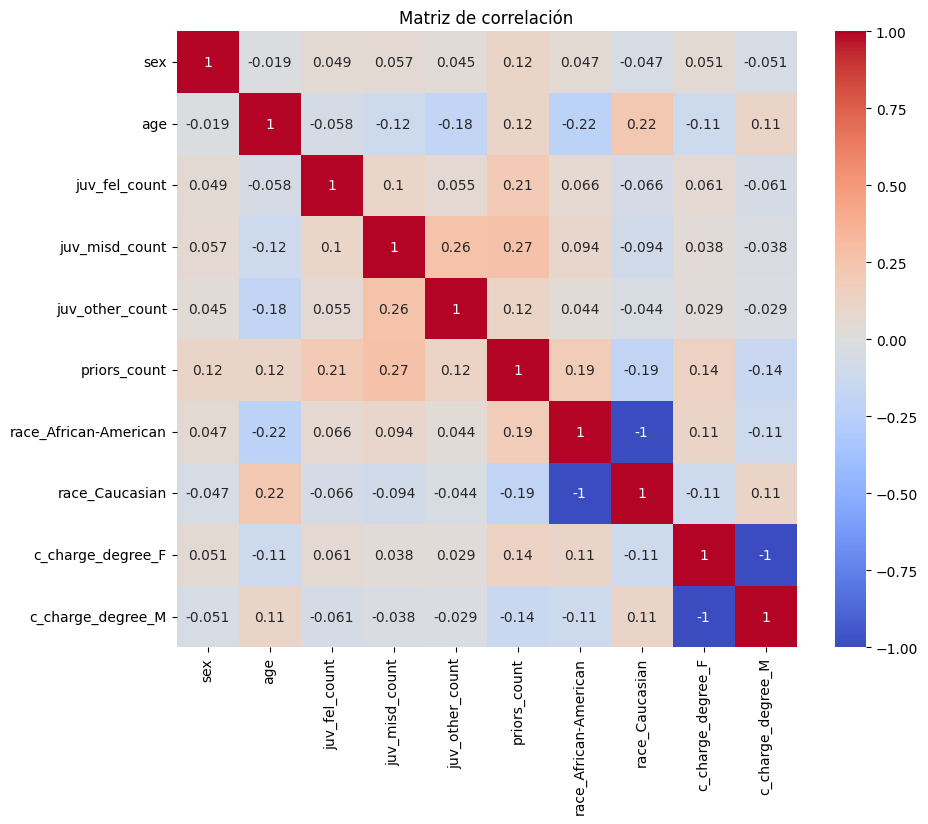

In [6]:
corr = X.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlación")
plt.show()


**Mayoría de correlaciones entre -0.2 y +0.3**:
- No hay multicolinealidad fuerte (no hay pares > 0.8).
- Las variables son moderadamente independientes, lo que favorece tanto modelos lineales como GAMs.

**Observación específica**:
- age vs juv_misd_count (-0.12): Los más jóvenes tienden a más delitos menores → posible efecto no lineal con la edad.
- juv_misd_count vs juv_other_count (0.26): Ligera correlación
- priors_count vs juv_misd_count (0.27): Más antecedentes, más delitos previos; puede haber saturación (no linealidad).
- Perfectamente correlacionadas variables de grado de cargo criminal F (felony) y M (misdemeanor) -> ya que si tiene cargo F, no lo tendrà M
- Igual correlacionadas, persona es afroamericana o caucasica -> ya que si es afroamericano, no es caucasico

## Correlación entre variables y objetivo

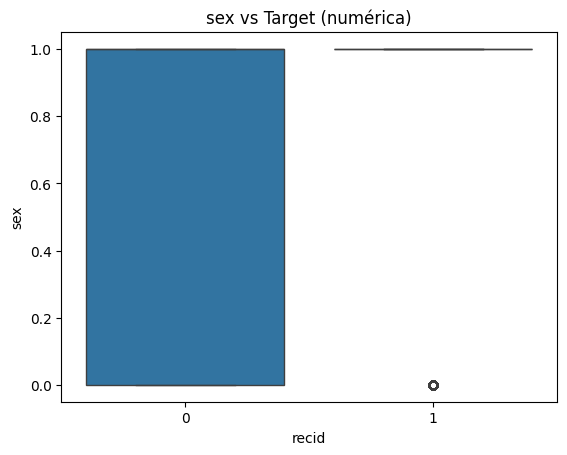

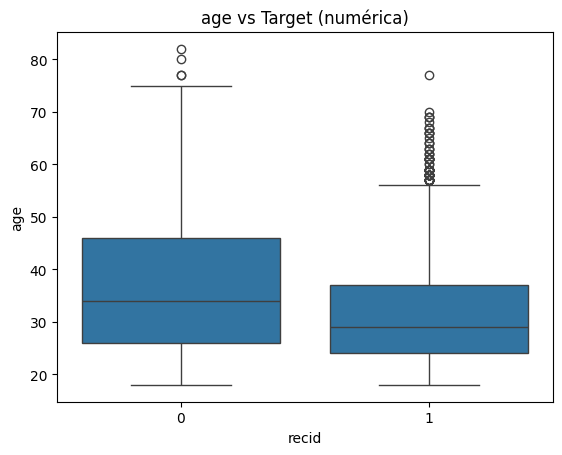

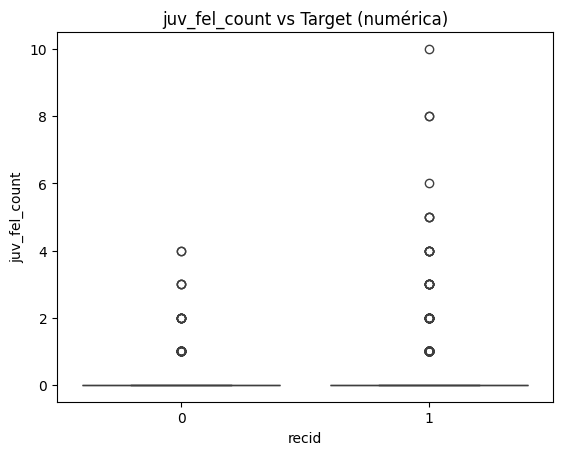

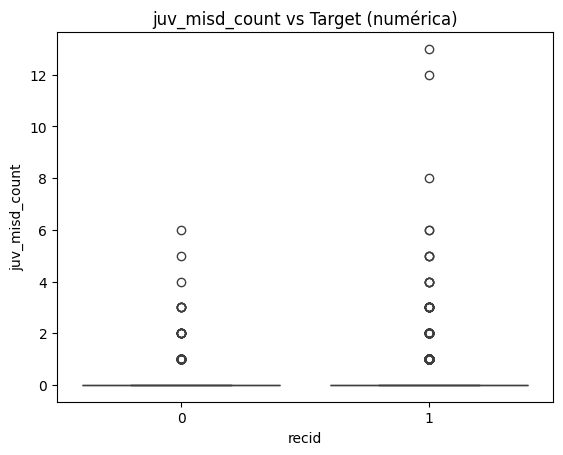

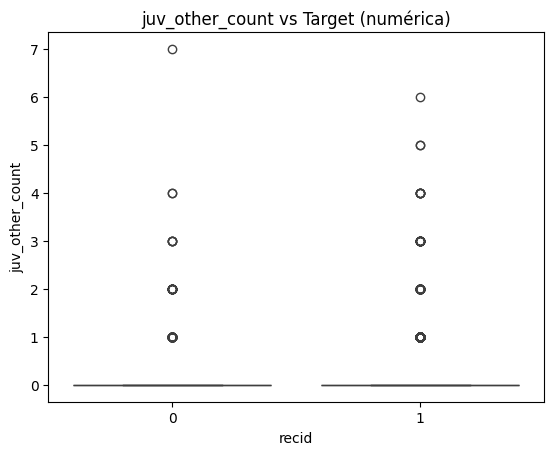

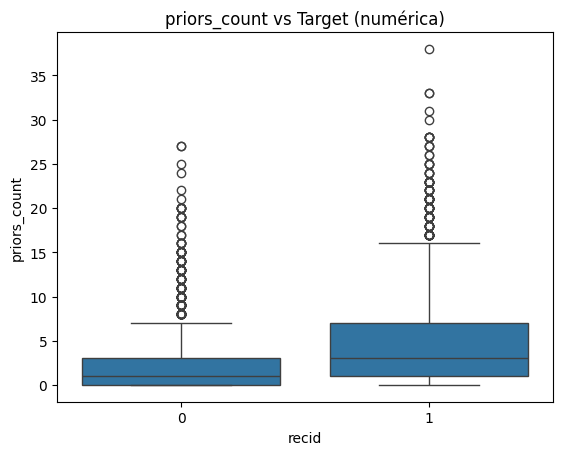

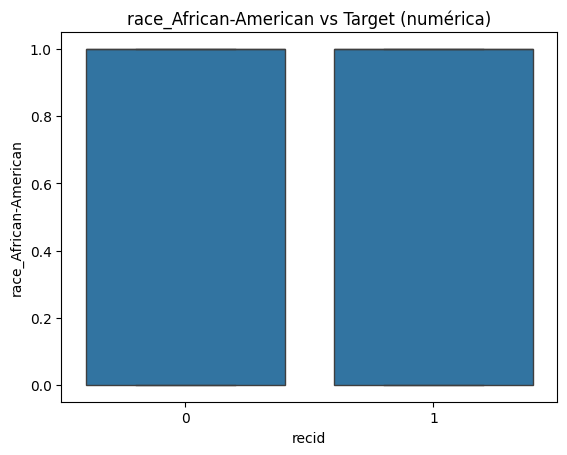

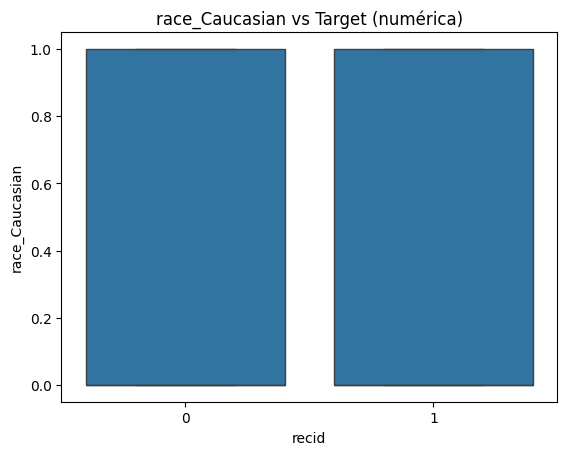

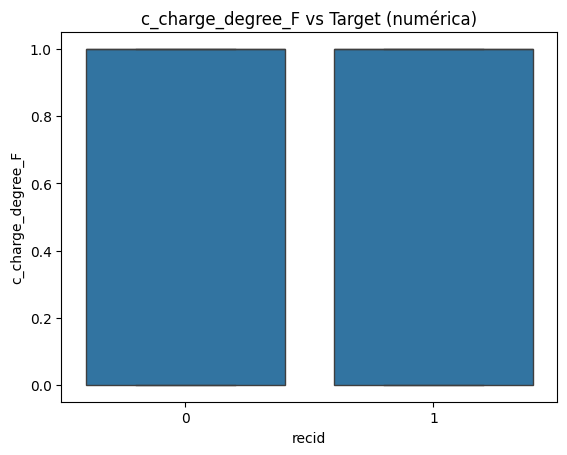

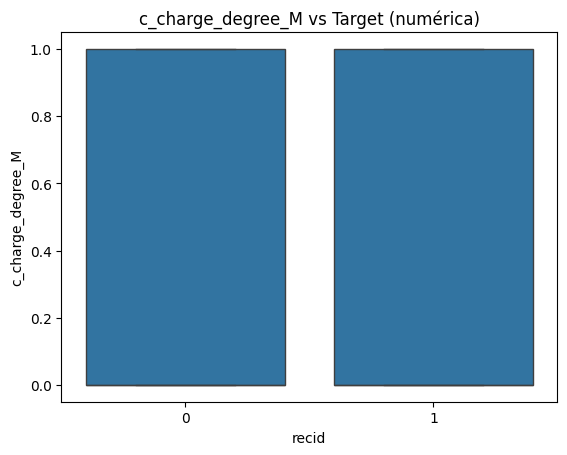

In [7]:
for col in X.select_dtypes(include='number').columns:
    sns.boxplot(x=y, y=X[col])
    plt.title(f"{col} vs Target (numérica)")
    plt.show()


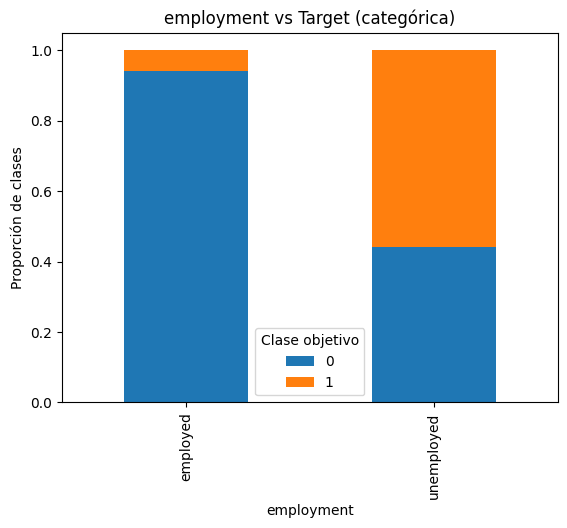

In [10]:
import matplotlib.pyplot as plt

for col in X.select_dtypes(exclude='number').columns:
    temp = pd.crosstab(X[col], y, normalize='index')  # proporción de cada clase por categoría
    temp.plot(kind='bar', stacked=True)
    plt.title(f"{col} vs Target (categórica)")
    plt.ylabel("Proporción de clases")
    plt.legend(title="Clase objetivo")
    plt.show()
